In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [3]:
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [4]:
#Rename columns
stud.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
       'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'school_sup', 'fam_sup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'fam_rel',
       'freetime', 'goout', 'health', 'absences', 'score']

In [5]:
#Drop column with negative values
stud.drop(['studytime, granular'], inplace = True, axis = 1)
stud.head(10)

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [6]:
#Replace nan
for col in stud:
    stud[col] = stud[col].apply(lambda x: None if 'nan' in str(x) else x)
stud.head(10)

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [7]:
#Fill empty status if empty and if fam_size GT3
stud.loc[((stud['p_status'].isnull()) & (stud['fam_size'] == 'GT3')), 'p_status'] = 'T'
stud.p_status.value_counts()

T    342
A     36
Name: p_status, dtype: int64

In [8]:
#Mistakes in dataset
stud.loc[(stud['fam_rel'] == -1.0), 'fam_rel'] = 1.0
stud.fam_rel.value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: fam_rel, dtype: int64

In [9]:
stud.loc[(stud['f_edu'] == 40), 'f_edu'] = 4
stud.f_edu.value_counts()

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: f_edu, dtype: int64

25-th percentile: 16.0, 75-th percentile: 18.0, IQR: 2.0,  Outliers range: [13.0, 21.0].


16    104
17     98
15     82
18     82
19     24
20      3
21      1
Name: age, dtype: int64

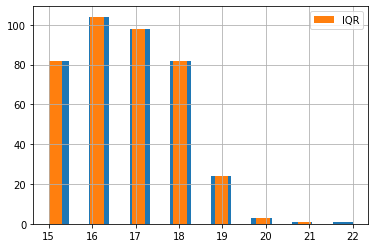

In [10]:
stud.age.hist(bins = 15)
stud.age.describe()

#IQR method to remove outliers
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
print('25-th percentile: {},'.format(perc25), '75-th percentile: {},'.format(perc75), "IQR: {}, ".format(IQR), "Outliers range: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.age.loc[stud.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 22, range = (15, 22), label = 'IQR')
plt.legend()
stud = stud.loc[stud.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
stud.age.value_counts()

GP    348
MS     46
Name: school, dtype: int64

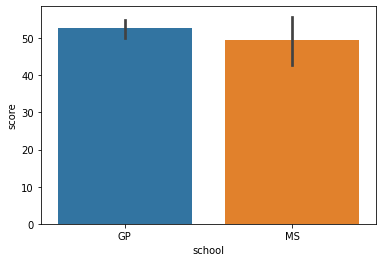

In [11]:
# School dependency
sns.barplot(x = 'school', y = 'score', data = stud)
stud.school.value_counts()

U    294
R     83
Name: address, dtype: int64

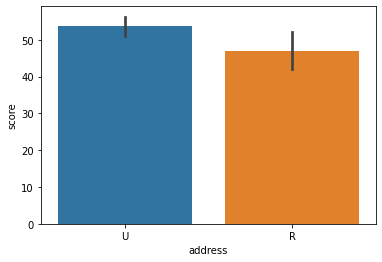

In [12]:
#Location dependency
sns.barplot(x = 'address', y = 'score', data = stud)
stud.address.value_counts()

<AxesSubplot:xlabel='sex', ylabel='score'>

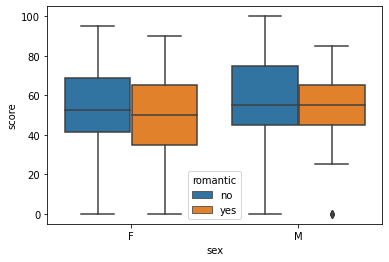

In [13]:
#Sex and relationships dependency
sns.boxplot(x = 'sex', y = 'score', data = stud, hue = 'romantic')

GT3    260
LE3    107
Name: fam_size, dtype: int64

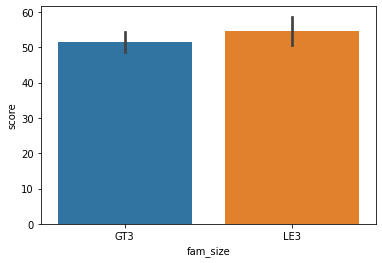

In [14]:
#Family size dependency
sns.barplot(x = 'fam_size', y = 'score', data = stud)
stud.fam_size.value_counts()

<AxesSubplot:xlabel='fam_rel', ylabel='score'>

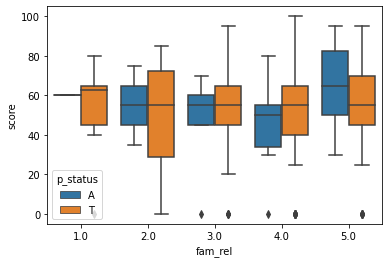

In [15]:
#Family dependency
sns.boxplot(x = 'fam_rel', y = 'score', data = stud, hue = 'p_status')

count    370.000000
mean       2.521622
std        1.087409
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        4.000000
Name: f_edu, dtype: float64

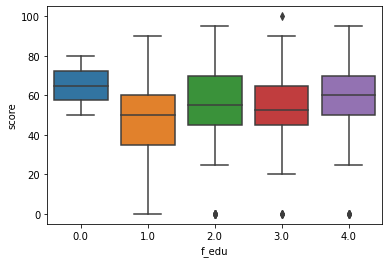

In [16]:
#Father's education dependency
sns.boxplot(x = 'f_edu', y = 'score', data = stud)
stud.f_edu.describe()

4.0    131
2.0    102
3.0     96
1.0     59
0.0      3
Name: m_edu, dtype: int64

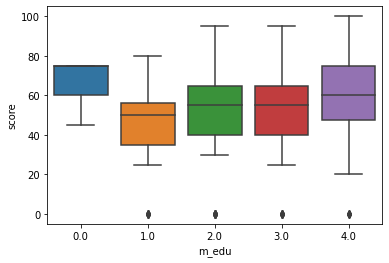

In [17]:
#Mother's education dependency
sns.boxplot(x = 'm_edu', y = 'score', data = stud)
stud.m_edu.value_counts()

other       197
services    101
teacher      29
at_home      16
health       15
Name: f_job, dtype: int64

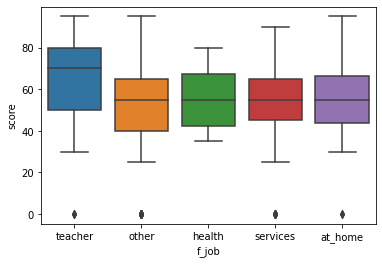

In [18]:
#Father's job dependency
sns.boxplot(x = 'f_job', y = 'score', data = stud)
stud.f_job.value_counts()

other       133
services     97
at_home      58
teacher      55
health       32
Name: m_job, dtype: int64

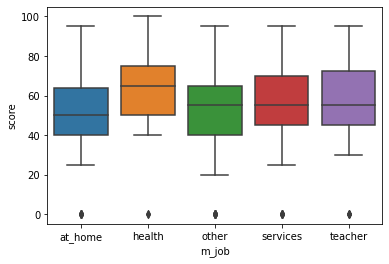

In [19]:
#Mother's job dependency
sns.boxplot(x = 'm_job', y = 'score', data = stud)
stud.m_job.value_counts()

In [20]:
stud.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
14.0      12
12.0      12
3.0        8
7.0        6
16.0       6
18.0       5
5.0        5
20.0       4
9.0        3
22.0       3
1.0        3
13.0       2
15.0       2
11.0       2
40.0       1
38.0       1
56.0       1
23.0       1
24.0       1
25.0       1
385.0      1
17.0       1
75.0       1
21.0       1
212.0      1
28.0       1
19.0       1
26.0       1
30.0       1
54.0       1
Name: absences, dtype: int64

count    382.000000
mean       7.256545
std       23.491712
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

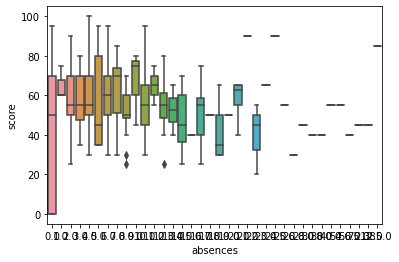

In [21]:
sns.boxplot(x = 'absences', y = 'score', data = stud)
stud.absences.describe()

25-th percentile: 0.0, 75-th percentile: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


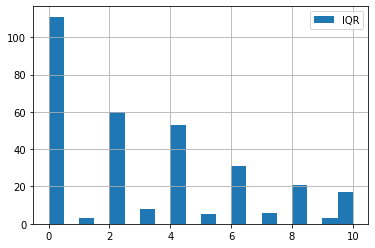

In [22]:
#IQR method to remove outliers
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-th percentile: {},'.format(perc25), '75-th percentile: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 20, range = (0, 10), label = 'IQR')
plt.legend();

In [25]:
stud = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
stud.absences.describe()

count    365.000000
mean       4.572603
std        4.936221
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

count    360.000000
mean      52.027778
std       22.979325
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

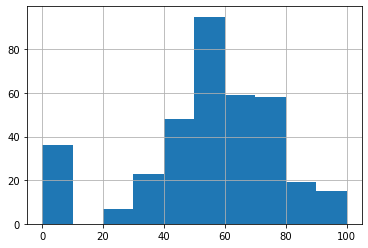

In [26]:
stud.score.hist()
stud.score.describe()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Outliers range: [-5.0, 115.0].


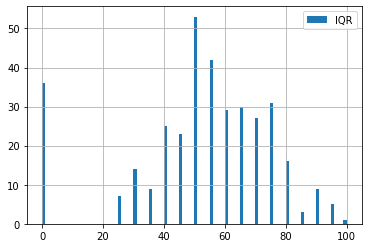

In [27]:
#IQR method to remove outliers
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-th percentile: {},'.format(perc25), '75-th percentile: {},'.format(perc75), "IQR: {}, ".format(IQR), "Outliers range: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.score.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 100, range = (0, 100), label = 'IQR')
plt.legend();

count    324.000000
mean      57.808642
std       15.864572
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

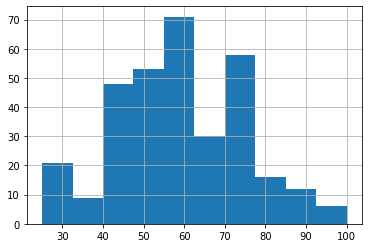

In [29]:
# Score havent got outliers, but we see a lot of scores with zero value,so we need to remove that ones.
stud = stud.loc[stud.score.between(1.0, perc75 + 1.5*IQR)]
stud.score.hist()
stud.score.describe()

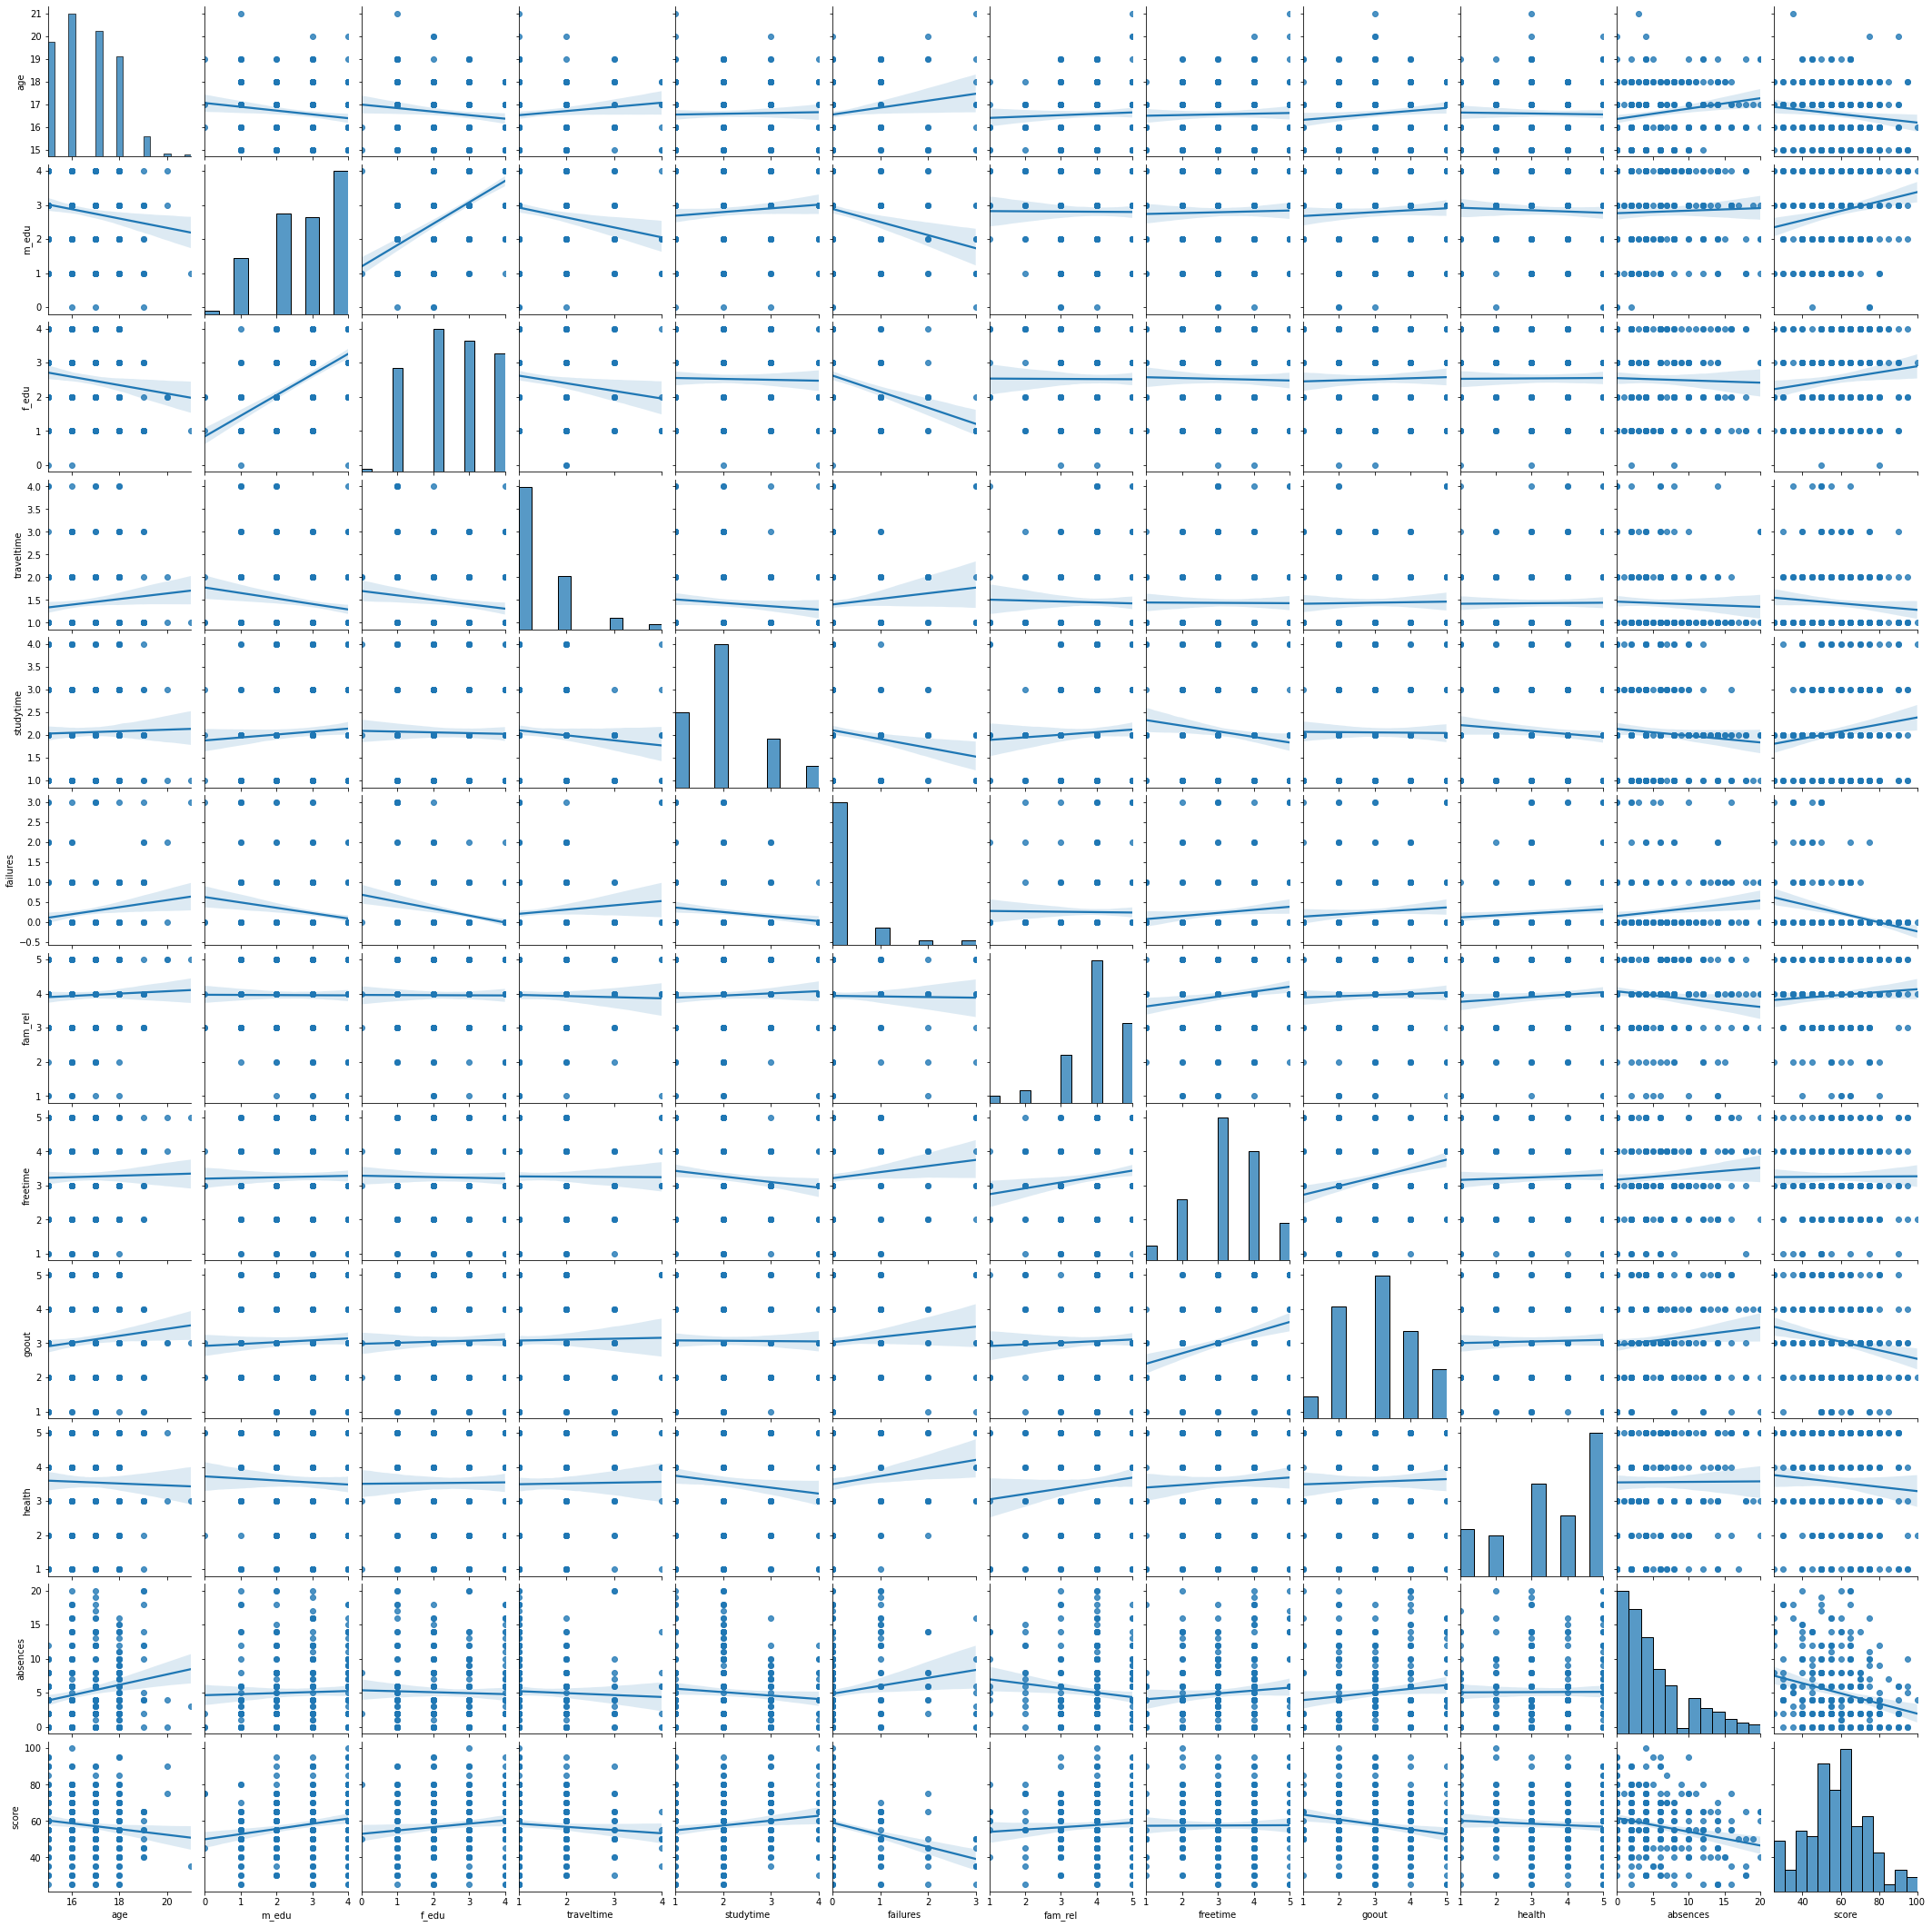

In [65]:
# Correlation analysis
sns.pairplot(stud, kind = 'reg')

In [31]:
#Correlation matrix
stud.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,fam_rel,freetime,goout,health,absences,score
age,1.000000,-0.151724,-0.138213,0.106599,0.024465,0.164154,0.045797,0.024844,0.116117,-0.024574,0.187220,-0.120720
m_edu,-0.151724,1.000000,0.616063,-0.187845,0.083850,-0.226861,-0.005260,0.022846,0.055659,-0.046968,0.033582,0.198144
f_edu,-0.138213,0.616063,1.000000,-0.147713,-0.021088,-0.286182,-0.004324,-0.021871,0.030860,0.008204,-0.030635,0.129316
traveltime,0.106599,-0.187845,-0.147713,1.000000,-0.091526,0.114840,-0.026293,-0.005420,0.017825,0.011604,-0.040485,-0.079554
studytime,0.024465,0.083850,-0.021088,-0.091526,1.000000,-0.147604,0.060444,-0.141718,-0.008018,-0.106897,-0.086713,0.143575
failures,0.164154,-0.226861,-0.286182,0.114840,-0.147604,1.000000,-0.013372,0.117136,0.093129,0.109471,0.149739,-0.274260
fam_rel,0.045797,-0.005260,-0.004324,-0.026293,0.060444,-0.013372,1.000000,0.158467,0.040419,0.106736,-0.122402,0.073056
freetime,0.024844,0.022846,-0.021871,-0.005420,-0.141718,0.117136,0.158467,1.000000,0.280662,0.051937,0.086174,0.004993
goout,0.116117,0.055659,0.030860,0.017825,-0.008018,0.093129,0.040419,0.280662,1.000000,0.029965,0.120559,-0.183626
health,-0.024574,-0.046968,0.008204,0.011604,-0.106897,0.109471,0.106736,0.051937,0.029965,1.000000,0.005578,-0.071808


<AxesSubplot:>

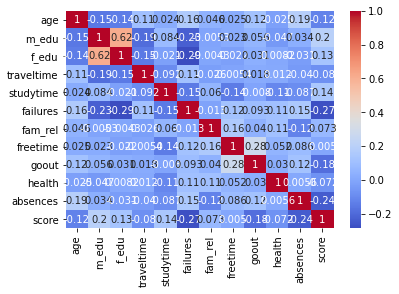

In [72]:
#Heat map
correlation = stud.corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [66]:
# m_edu – f_edu, freetime – goout, correlate with each other more, than others, so we can use only one of this params in future.
# The most correlating depending properties with score: 'm_edu', 'fam_rel', 'studytime', 'failures', 'absences'


In [60]:
# Рассмотрим корреляцию для строчных столбцов. Анализ номинативных переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (20, 5))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

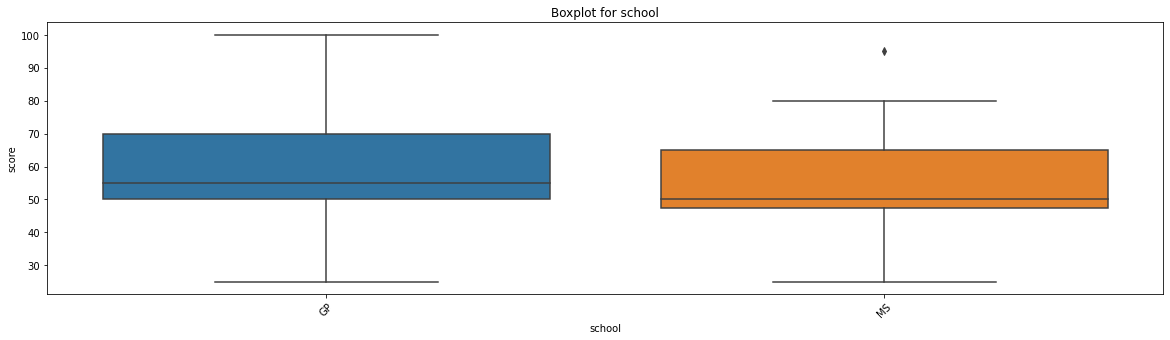

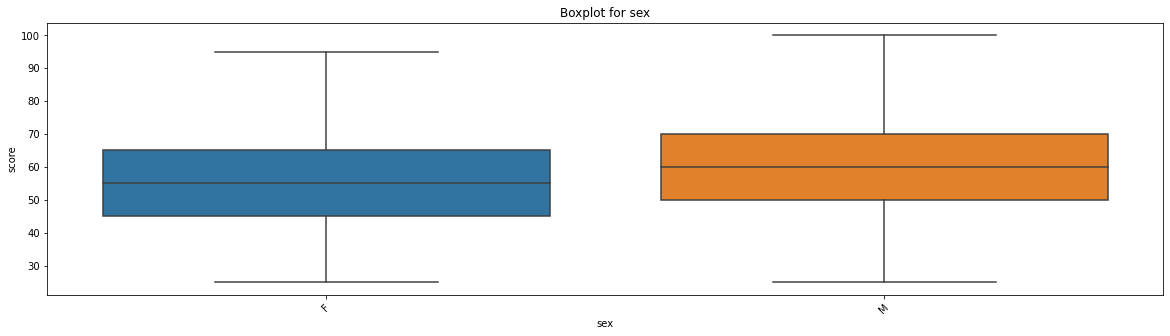

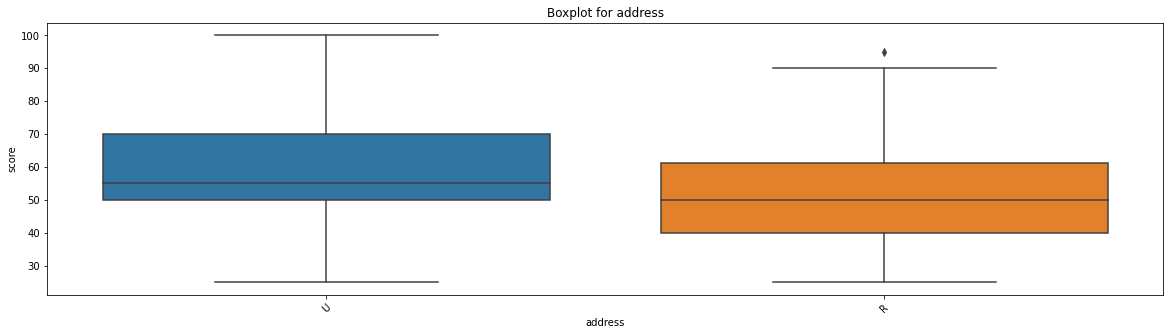

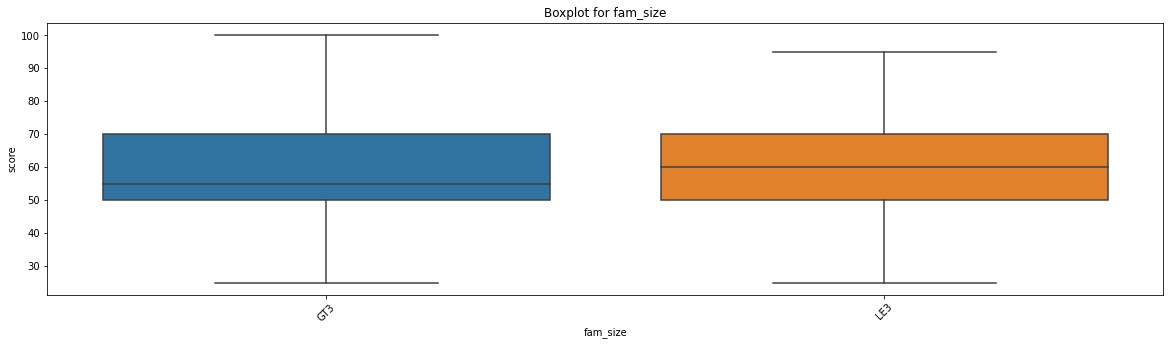

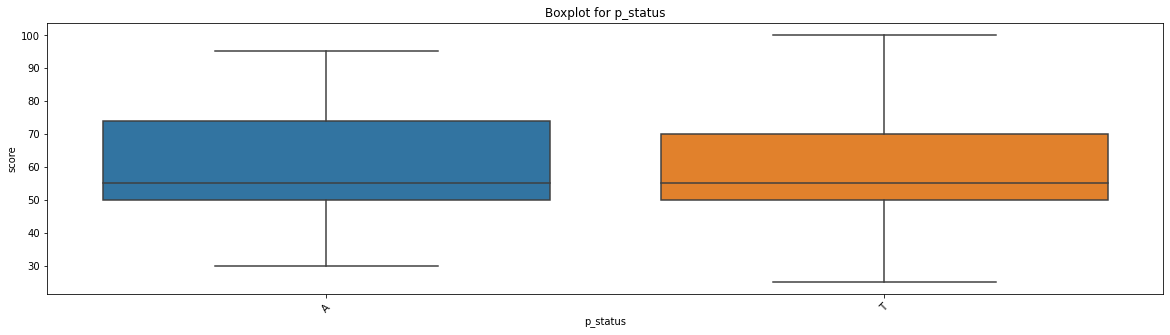

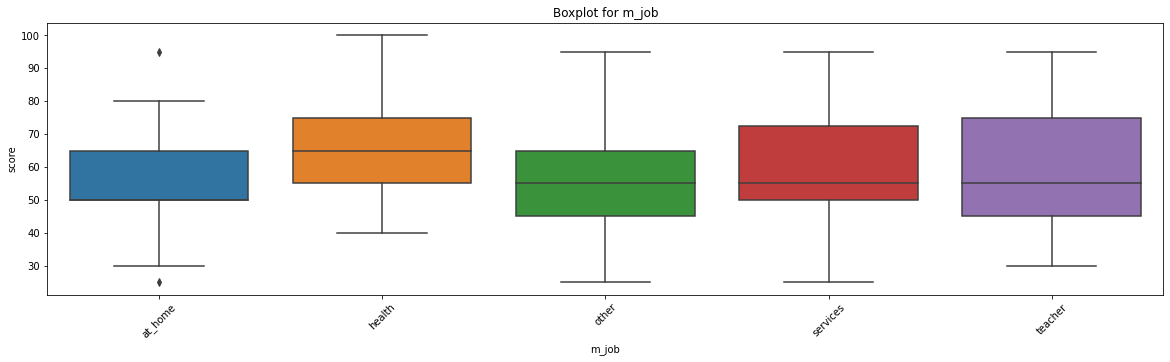

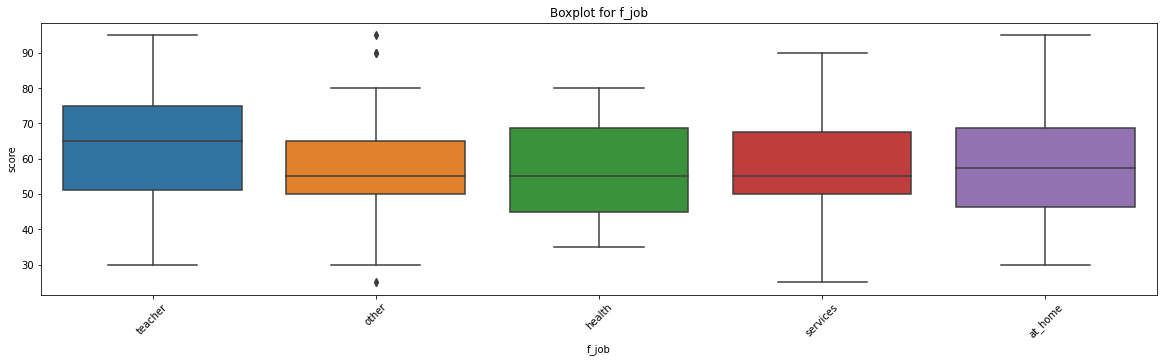

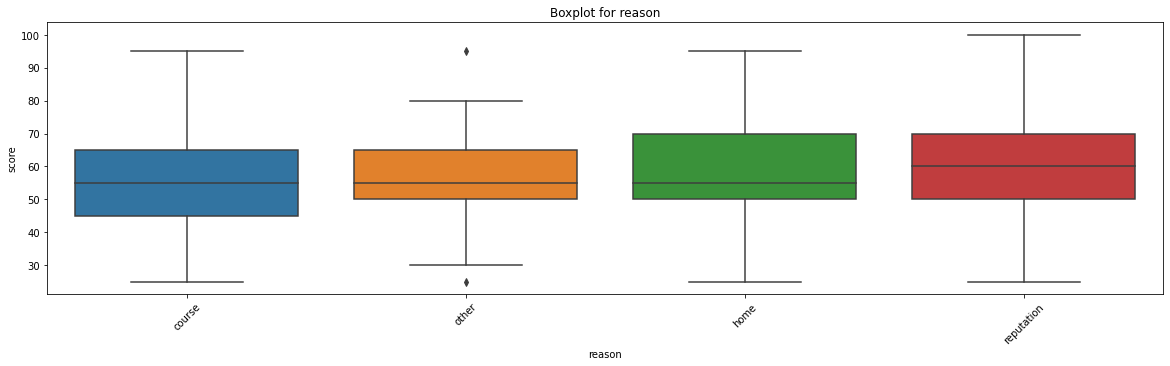

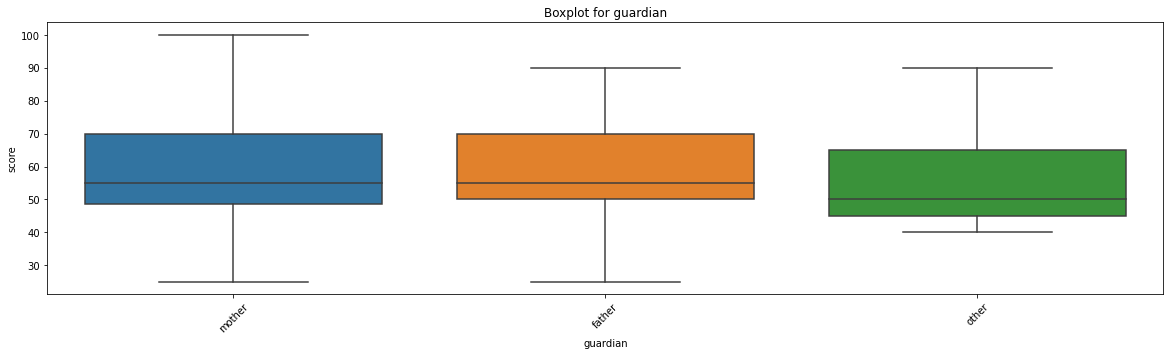

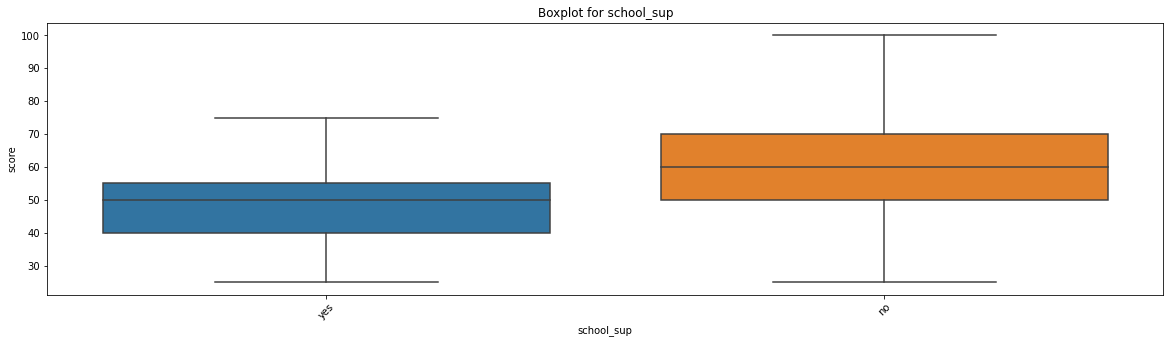

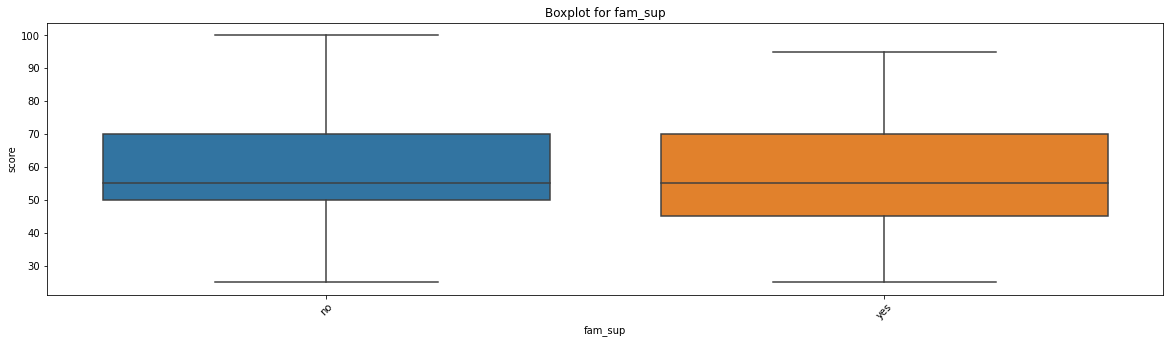

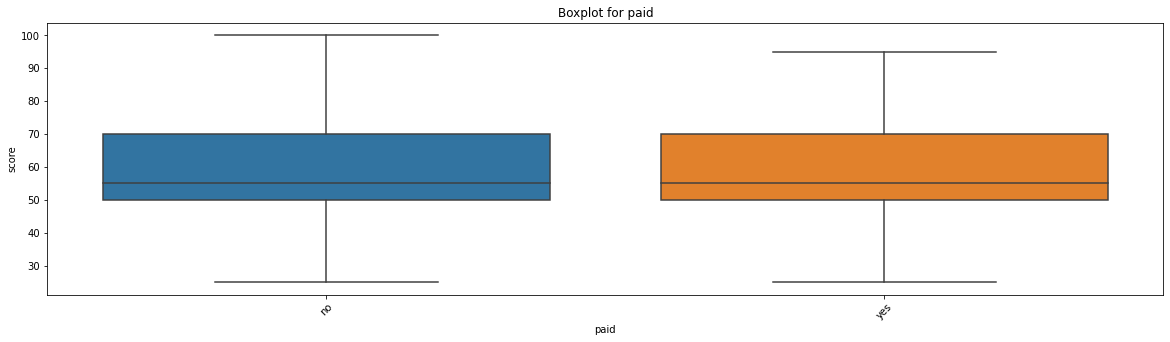

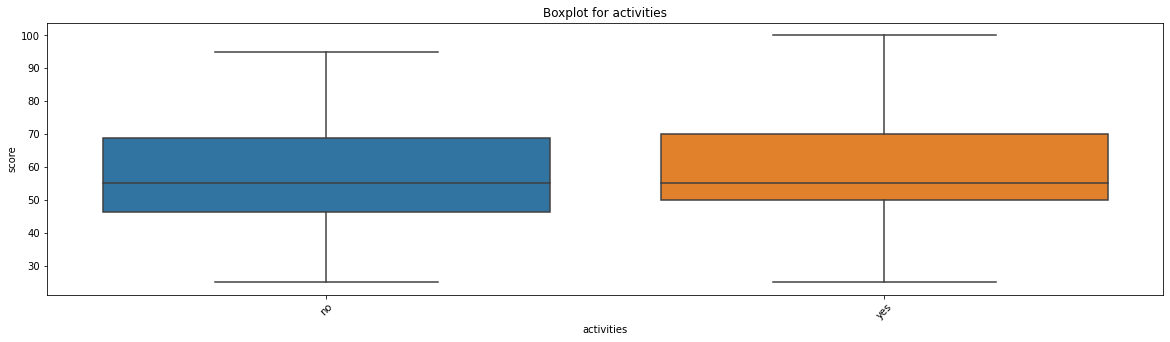

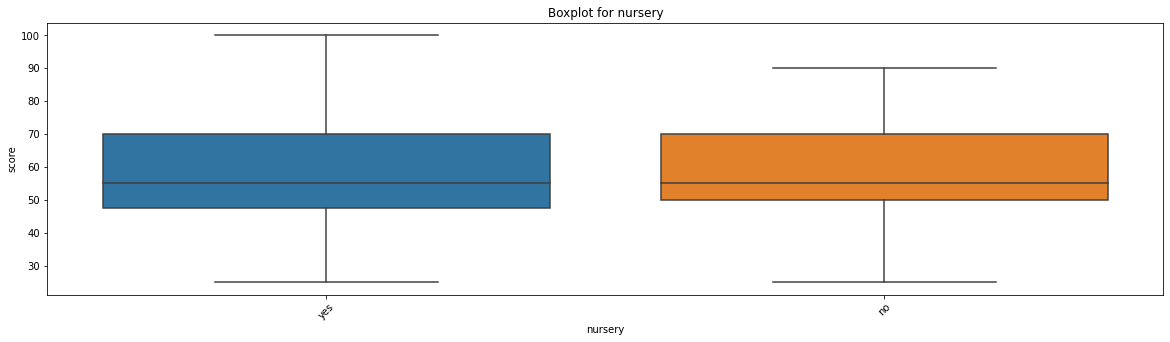

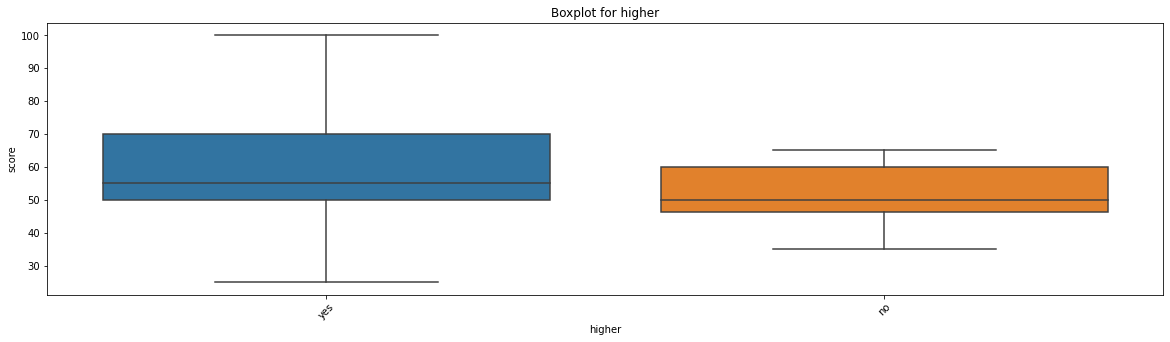

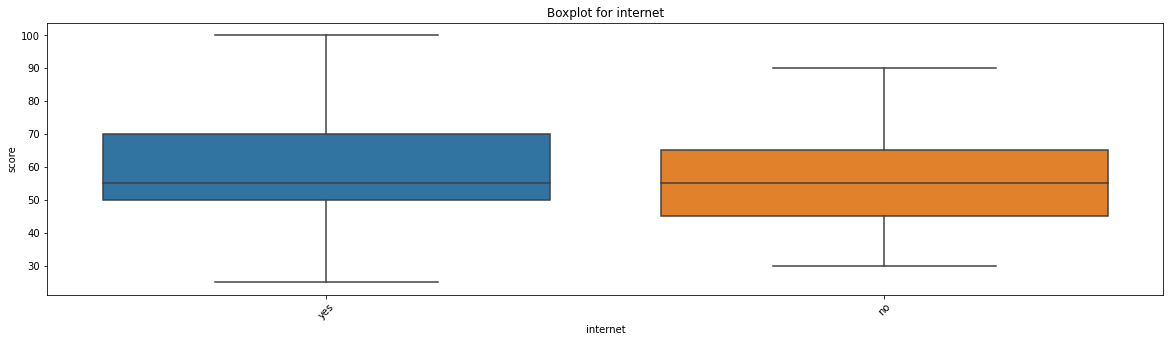

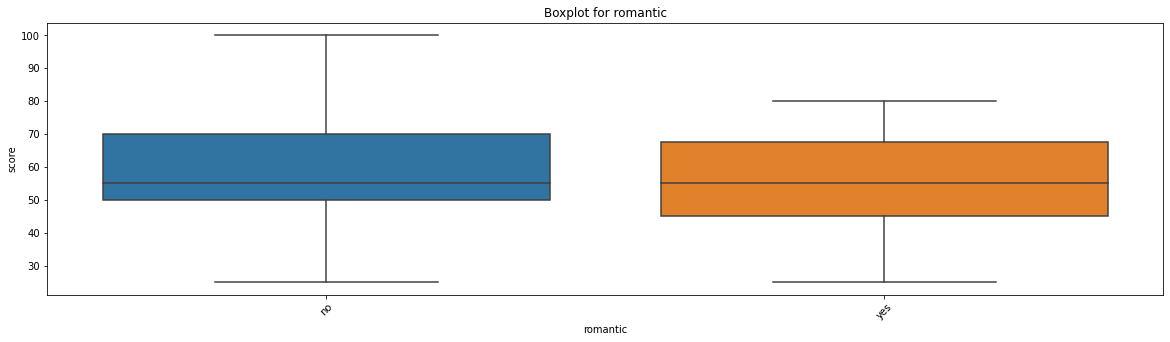

In [61]:
for col in ['school', 'sex', 'address', 'fam_size', 'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'school_sup', 
            'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [74]:
# Проверим нулевую гипотезу о том, что распределения оценок учеников по различным параметрам неразличимы
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [70]:
for col in ['school', 'sex', 'address', 'fam_size', 'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'school_sup', 
            'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки school_sup


In [75]:
#Possible properties, which can influence on score:
stud_for_model = stud.loc[:, ['sex', 'address', 'm_job', 'school_sup',
                              'm_edu', 'fam_rel', 'studytime', 'failures', 'absences']]
stud_for_model.head()

,sex,address,m_job,school_sup,m_edu,fam_rel,studytime,failures,absences
0,F,U,at_home,yes,4.0,4.0,2.0,0.0,6.0
1,F,U,at_home,no,1.0,5.0,2.0,0.0,4.0
2,F,U,at_home,yes,1.0,4.0,2.0,3.0,10.0
3,F,U,health,no,4.0,3.0,3.0,0.0,2.0
4,F,U,other,no,3.0,4.0,2.0,0.0,4.0
